Датасет guide_raw.csv содержит разговоры Kaspi-гидов с клиентами. Цель Kaspi-гида - научить клиента пользоваться сервисами экосистемы Kaspi. 

Нам интересно, что отличает эффективные разговоры от неэффективных, и какие гиды лучше помогают клиентам разобраться с сервисами Kaspi, и как им это удается. Эффективным разговором мы считаем, если клиент совершил платеж (телефон, коммуналки и т.д.) на Kaspi.kz в течении 3х дней после разговора с гидом.

Сможет ли речевая аналитика нам в этом помочь?


1) Откройте файл **'input/guide_raw.csv'**. 
- Текст в поле **'txt'** был распознан из аудиозаписи разговора автоматически. Считаете ли вы, что система распознавания звука отлично справилась со своей работой?
- Сколько в файле записей?
- Какой рейндж дат по нашим данным?
- Сколько гидов охватывают данные?
- Опишите статистики по гидам (сколько минимум/максимум разговоров, сколько в среднем разговоров, медиана)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from pandas_profiling import ProfileReport
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns


/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packag

In [121]:
data = pd.read_csv('data/guide_raw.csv')

In [122]:
data.head()

,Unnamed: 0,personnel_num,guide_date,guide_time,conversion,target_3_days,txt
0,0,1512,18-05-2018,14:44,Нет конверсии,0,сейчас скажу своим да и ещё что-то он на сайте...
1,1,1512,21-05-2018,9:46,Конверсия платежа,1,спасибо до свидания хорошо я рада была вам пом...
2,2,1512,25-05-2018,14:25,Конверсия посещения,0,будет готово ставка финансовые есть как это от...
3,3,1820,27-05-2018,12:41,Конверсия платежа,1,сейчас все закрыто хорошо узнаю все делать оче...
4,4,1820,18-05-2018,10:12,Нет конверсии,0,окей справ после а сколько апелляционный понят...


In [16]:
ProfileReport(data)

Number of variables,7
Number of observations,1796
Total Missing (%),0.0%
Total size in memory,98.3 KiB
Average record size in memory,56.0 B
Numeric,2
Categorical,3
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [7]:
data.shape

(1796, 7)

In [ ]:
#Сколько в файле записей?  1796

In [4]:
data.conversion.value_counts()

Нет конверсии          718
Конверсия посещения    690
Конверсия платежа      388
Name: conversion, dtype: int64

In [123]:
from datetime import datetime
data.date1 = data.guide_date.apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [124]:
#Какой рейндж дат по нашим данным?
print(data.guide_date.max())
print(data.guide_date.min())

27-05-2018
04-05-2018


In [125]:
data.personnel_num.value_counts()
#Сколько гидов охватывают данные? 265

36304    17
36559    17
31296    16
32054    16
24375    15
25036    14
34636    14
34263    14
23934    14
33333    14
37653    14
23522    14
34426    13
31297    13
5294     13
36342    13
32252    13
33435    13
33300    13
34072    12
33298    12
34377    12
25880    12
33721    12
34349    12
37699    12
33474    12
37728    12
34795    12
36630    12
         ..
35456     2
35442     2
37608     2
33780     2
32206     2
33687     2
21034     2
7680      2
29402     2
35911     1
33650     1
37707     1
23640     1
35761     1
15098     1
21629     1
33810     1
22431     1
33989     1
21306     1
13906     1
29968     1
32046     1
19062     1
22916     1
9667      1
31179     1
30174     1
36404     1
37829     1
Name: personnel_num, Length: 265, dtype: int64

In [126]:
#Опишите статистики по гидам (сколько минимум/максимум разговоров, сколько в среднем разговоров, медиана)
data.personnel_num.value_counts().max()

17

In [127]:
data.personnel_num.value_counts().min()

1

In [128]:
data.personnel_num.value_counts().median()

7.0

In [129]:
data.personnel_num.value_counts().mean()

6.777358490566038

In [130]:
data.date.min()

AttributeError: 'DataFrame' object has no attribute 'date'

In [131]:
data["date"] = data.guide_date.apply(lambda x: pd.Series(x.split("-")[0]))

In [132]:
data["month"] = data.guide_date.apply(lambda x: pd.Series(x.split("-")[1]))

In [134]:
data.month.value_counts()

05    1796
Name: month, dtype: int64

# During Month


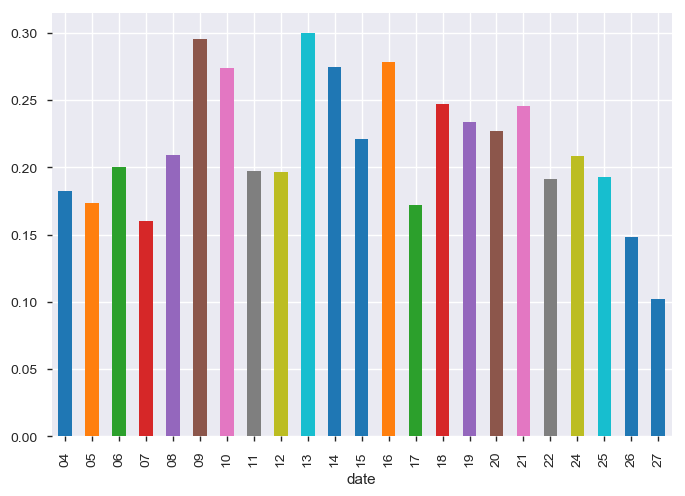

In [135]:
data.groupby('date').mean().target_3_days.plot.bar()

# During a Day

In [136]:
data["hours"] = data.guide_time.apply(lambda x: pd.Series(x.split(":")[0]))

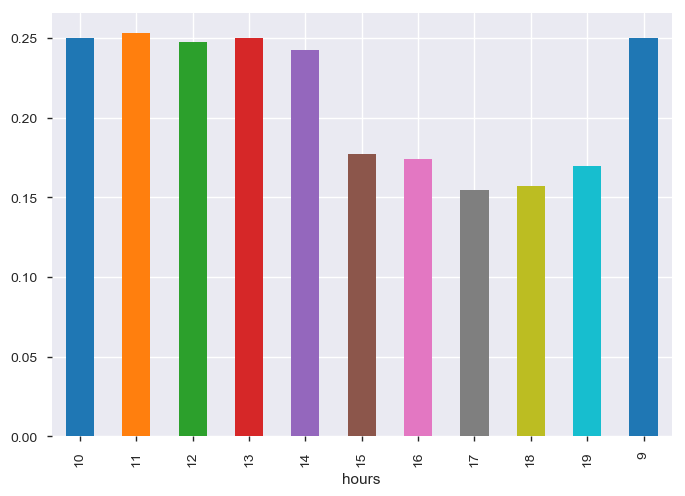

In [140]:
data.groupby('hours').mean().target_3_days.plot.bar()

In [155]:
from collections import Counter
data["wordcount"] = data.txt.apply(lambda x: len(x.split(' ')))


# Does duration change?

In [156]:
data.head()

,Unnamed: 0,personnel_num,guide_date,guide_time,conversion,target_3_days,txt,date,month,hours,weekday,wordcount
0,0,1512,18-05-2018,14:44,Нет конверсии,0,сейчас скажу своим да и ещё что-то он на сайте...,18,05,14,Friday,1377
1,1,1512,21-05-2018,9:46,Конверсия платежа,1,спасибо до свидания хорошо я рада была вам пом...,21,05,9,Monday,850
2,2,1512,25-05-2018,14:25,Конверсия посещения,0,будет готово ставка финансовые есть как это от...,25,05,14,Friday,1054
3,3,1820,27-05-2018,12:41,Конверсия платежа,1,сейчас все закрыто хорошо узнаю все делать оче...,27,05,12,Sunday,1130
4,4,1820,18-05-2018,10:12,Нет конверсии,0,окей справ после а сколько апелляционный понят...,18,05,10,Friday,877


In [174]:
afternoon = data[data.hours.astype(int)>14]

In [175]:
morning = data[data.hours.astype(int)<=14]

In [176]:
afternoon = afternoon.txt

5       ничего не тридцать два сама в расписываться Ал...
10      здравствуйте присаживайтесь у меня зовут Лена ...
12      почему же закрыть нажимаете человек конечно зв...
13      проходите присаживайтесь аккуратно все меня зо...
16      расплачиваться указан в пять процентов процент...
20      через перенос да завтра СМСку не забудь ты как...
21      сумму нужно уточнить можно оставить понятно ва...
22      и как полностью погашение семьдесят назад по к...
28      зайти ну как хотите угу вкусно значит так что ...
31      понимаешь алло часов блядь какую сумму период ...
32      на всякий каким по поводу если когда так сдела...
34      двенадцать девятьсот подпись воспоминания ладн...
35      угу телефона судебной не работает этих игр и ш...
40      вот вот рассказывал таких не сделал благодарны...
42      это направить угу машина перед продукция именн...
46      так у него письма до свидания а он перезвоню т...
47      все да нет сейчас тут пиздец блядь изменились ...
48      вперед

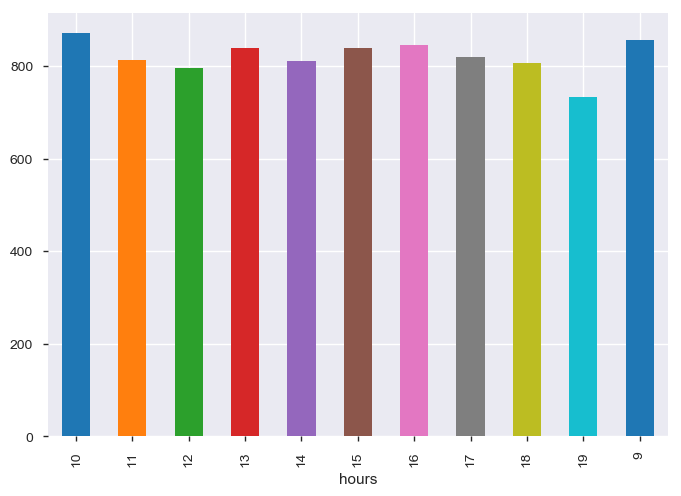

In [157]:
data.groupby('hours').mean().wordcount.plot.bar()

# During a Week

In [158]:
data["weekday"] = pd.to_datetime(data.guide_date).apply(lambda x: x.weekday_name)

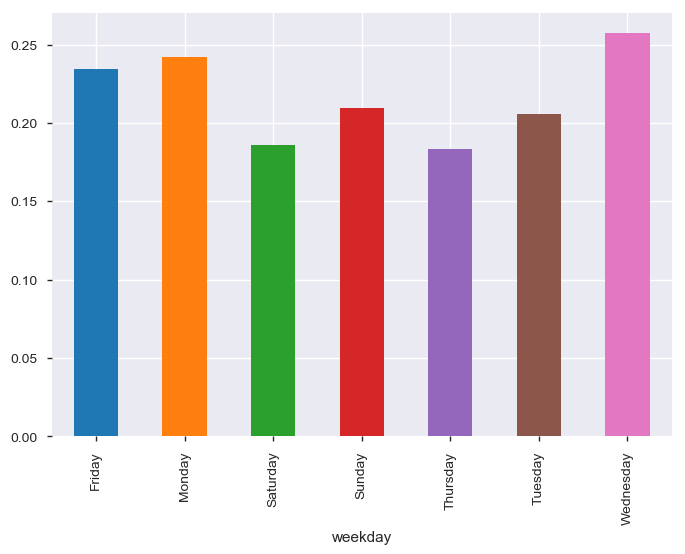

In [159]:
data.groupby('weekday').mean().target_3_days.plot.bar()

# Duration during a Week



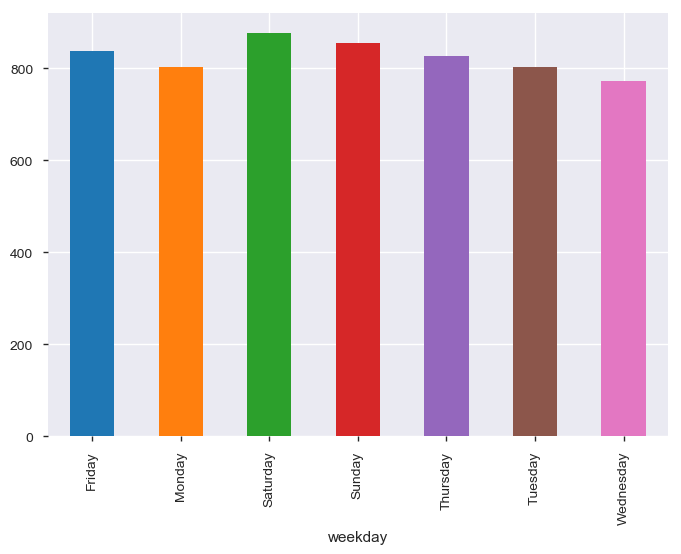

In [161]:
data.groupby('weekday').mean().wordcount.plot.bar()

In [162]:
from collections import Counter
data["wordtypes"] = data.txt.apply(lambda x: Counter(x.split(' ')))


In [165]:
data.wordtypes[0]

Counter({'сейчас': 17,
         'скажу': 1,
         'своим': 2,
         'да': 26,
         'и': 35,
         'ещё': 3,
         'что-то': 4,
         'он': 4,
         'на': 24,
         'сайте': 3,
         'карте': 2,
         'обязательно': 3,
         'зарегистрировались': 1,
         'не': 28,
         'знаю': 2,
         'я': 18,
         'вот': 39,
         'три': 5,
         'брала': 1,
         'электроника': 1,
         'тех': 1,
         'другой': 1,
         'а': 20,
         'нажимаете': 1,
         'что': 14,
         'есть': 14,
         'кредиты': 1,
         'депозиты': 3,
         'карточка': 4,
         'депозит': 1,
         'потом': 12,
         'это': 20,
         'пятьдесят': 3,
         'тысяч': 3,
         'то': 7,
         'у': 20,
         'вас': 16,
         'как': 21,
         'информацию': 4,
         'по': 9,
         'депозитам': 2,
         'после': 2,
         'открывайте': 1,
         'дверь': 1,
         'говорю': 1,
         'для': 2,
         'то

In [101]:
data.groupby('hours').mean().target_3_days

hours
10    0.250000
11    0.253219
12    0.247525
13    0.250000
14    0.242424
15    0.177340
16    0.174359
17    0.154362
18    0.157025
19    0.169492
9     0.250000
Name: target_3_days, dtype: float64

In [96]:
gids = data[data.target_3_days==1].groupby("personnel_num").count().target_3_days.sort_values(ascending=False)

In [104]:
gids

personnel_num
31733    7
36559    6
32252    5
33721    5
33474    5
23522    5
25036    4
32298    4
15282    4
32054    4
34795    4
36323    4
34426    4
23934    4
34635    4
31231    4
26932    4
32821    3
34349    3
33495    3
20358    3
33994    3
34092    3
34072    3
34022    3
24571    3
33333    3
33726    3
24375    3
33680    3
        ..
32254    1
31272    1
31298    1
31399    1
31405    1
31677    1
31859    1
31863    1
31865    1
31868    1
32004    1
32121    1
32123    1
32154    1
32257    1
33445    1
32401    1
32402    1
37728    1
32801    1
33116    1
33308    1
33324    1
33327    1
33428    1
33429    1
33435    1
33441    1
33443    1
1512     1
Name: target_3_days, Length: 206, dtype: int64

In [77]:
d = pd.DataFrame(gids[gids>1])

In [102]:
list_index = list(d.index)

In [103]:
list_index

[31733,
 36559,
 32252,
 33721,
 33474,
 23522,
 25036,
 32298,
 15282,
 32054,
 34795,
 36323,
 34426,
 23934,
 34635,
 31231,
 26932,
 32821,
 34349,
 33495,
 20358,
 33994,
 34092,
 34072,
 34022,
 24571,
 33333,
 33726,
 24375,
 33680,
 33434,
 31178,
 33478,
 23266,
 26688,
 33486,
 29047,
 37653,
 31866,
 32256,
 37324,
 36342,
 37610,
 30799,
 31297,
 27364,
 31296,
 29173,
 33442,
 23935,
 29929,
 33432,
 30312,
 30165,
 31435,
 33383,
 31225,
 30992,
 32265,
 33316,
 31907,
 33306,
 31953,
 33298,
 29028,
 32025,
 33039,
 32250,
 32737,
 32253,
 32677,
 32676,
 32451,
 25880,
 33592,
 31174,
 33496,
 19627,
 19569,
 34670,
 35027,
 33566,
 35762,
 35815,
 35977,
 36304,
 36450,
 13154,
 36630,
 37110,
 11327,
 37233,
 11295,
 37439,
 37468,
 37699,
 5294,
 34636,
 35156,
 20853,
 20171,
 34377,
 21030,
 33850,
 34263,
 34075,
 33988,
 33642]

In [110]:
for i in list_index:
    s = data[data.personnel_num == i].drop(["txt", "Unnamed: 0"],axis=1)
    print(s)

     personnel_num  guide_date guide_time           conversion  target_3_days  \
632          31733  09-05-2018      18:41    Конверсия платежа              1   
633          31733  09-05-2018      11:41  Конверсия посещения              0   
634          31733  05-05-2018      15:56        Нет конверсии              0   
635          31733  21-05-2018      10:47    Конверсия платежа              1   
636          31733  21-05-2018      10:09    Конверсия платежа              1   
637          31733  04-05-2018      18:57  Конверсия посещения              0   
638          31733  27-05-2018      14:34    Конверсия платежа              1   
639          31733  21-05-2018      11:24    Конверсия платежа              1   
640          31733  17-05-2018      15:38    Конверсия платежа              1   
641          31733  26-05-2018      12:43  Конверсия посещения              0   
642          31733  04-05-2018      12:40    Конверсия платежа              1   

    date month hours  
632 

     personnel_num  guide_date guide_time           conversion  target_3_days  \
449          29929  21-05-2018      14:16        Нет конверсии              0   
450          29929  24-05-2018      10:25    Конверсия платежа              1   
451          29929  16-05-2018      10:39    Конверсия платежа              1   
452          29929  25-05-2018      19:05        Нет конверсии              0   
453          29929  17-05-2018      19:22  Конверсия посещения              0   
454          29929  25-05-2018      12:20  Конверсия посещения              0   

    date month hours  
449   21    05    14  
450   24    05    10  
451   16    05    10  
452   25    05    19  
453   17    05    19  
454   25    05    12  
      personnel_num  guide_date guide_time           conversion  \
1012          33432  17-05-2018      17:40  Конверсия посещения   
1013          33432  17-05-2018      18:26        Нет конверсии   
1014          33432  16-05-2018      19:23    Конверсия платежа   
101

1527              0   15    05    18  
      personnel_num  guide_date guide_time           conversion  \
1533          35977  25-05-2018      17:50        Нет конверсии   
1534          35977  26-05-2018      11:16        Нет конверсии   
1535          35977  25-05-2018      15:45        Нет конверсии   
1536          35977  13-05-2018      13:46    Конверсия платежа   
1537          35977  12-05-2018      18:02  Конверсия посещения   
1538          35977  15-05-2018      17:34    Конверсия платежа   
1539          35977  18-05-2018      18:09  Конверсия посещения   

      target_3_days date month hours  
1533              0   25    05    17  
1534              0   26    05    11  
1535              0   25    05    15  
1536              1   13    05    13  
1537              0   12    05    18  
1538              1   15    05    17  
1539              0   18    05    18  
      personnel_num  guide_date guide_time           conversion  \
1552          36304  25-05-2018      10:13  К

2) Запустите следующий код. 
- Что Вы наблюдаете?
- Может ли у слова быть несколько нормальных форм? 
- Проверьте, какие нормальные формы могут быть у слова 'стали'
- Как получить нормальную форму слова? 

In [112]:
!pip install pymorphy2
import pymorphy2


    100% |████████████████████████████████| 51kB 298kB/s ta 0:00:01
    100% |████████████████████████████████| 7.1MB 716kB/s ta 0:00:01
  Running setup.py bdist_wheel for docopt ... done
  Stored in directory: /Users/nazgulsakenova/Library/Caches/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt
distributed 1.21.8 requires msgpack, which is not installed.
[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.984662, methods_stack=((<DictionaryAnalyzer>, 'стали', 904, 4),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 1),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 2),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.0

In [113]:
morph = pymorphy2.MorphAnalyzer()
print (morph.parse('Стали'))

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.984662, methods_stack=((<DictionaryAnalyzer>, 'стали', 904, 4),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 1),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 2),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 5),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 6),)), Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.003067, methods_stack=((<DictionaryAnalyzer>, 'стали', 13, 9),))]


3) Откройте файл **'preprocessing.py'**. 
- Какие стоп-слова используются? Логичны ли они?
- Используется лемматизация или стемминг?
- Запустите код в следующей ячейке. Сколько записей в аутпут файле? А сколько должно быть? Сделайте соответствующие изменения в файле, получите результат. (Для того, чтобы Jupyter увидел изменения в файле, возможно, понадобится перезапустить kernel)
- Соедините результаты препроцессинга с исходным датафреймом (data/guide_raw.csv)

In [115]:
!pip install stop_words

  Running setup.py bdist_wheel for stop-words ... done
  Stored in directory: /Users/nazgulsakenova/Library/Caches/pip/wheels/d3/60/7e/bc83ee0496b334c47a572d498f029dc7be23a96a7166187885
Successfully built stop-words
distributed 1.21.8 requires msgpack, which is not installed.


In [116]:
%%time
import preprocessing as p

p.preprocess('data/guide_raw.csv', 'data/output.csv')

CPU times: user 11.4 s, sys: 485 ms, total: 11.8 s
Wall time: 13.8 s


4) Обучите word2vec (библиотека gensim):
- в корпусе слов оставьте только слова, повторяющиеся более одного раза
- обучите word2vec модель. На что влияют параметры size, window, min_count? Остановимся на size = 100
- создайте датафрейм, где индексами будут слова, а колонками - значения по измерениям получившихся векторов

5) Визуализируем то, что получилось.

- Нормализуйте данные по каждой колонке, чтобы значения были в интервале [0, 1]
- Используя dimensionality reduction (PCA/LDA..), спроецируйте 100-мерные векторы на двумерное пространство
- Выведите результат с метками (чтобы каждой точке на графике соответствовало слово)


6) Помните свойство word2vec, что слова, близкие в векторном пространстве, находятся примерно в одинаковом контексте? Быть может, мы сможем выделить основные тематики в разговорах?
- кластеризуйте слова на 15 кластеров, используя любой алгоритм на ваш выбор (но с заданным кол-вом кластеров)
- Выведите картинку точек на графике (используйте координаты двумерного пространства с прошлого задания), окрасив разные кластеры в разные цвета. Метки слов не нужны
- Удовлетворяют ли вас результаты кластеризации? Почему?

7) По каждому кластеру выведите список слов и попробуйте сформировать тему разговора, которой принадлежат эти кластеры

8) Можем ли мы предсказать, был ли платеж после разговора с гидом, основываясь только на word2vec признаках?
- Возьмите среднее векторное представление по каждому тексту и используйте его для тренировки модели с таргетом 'target_3_days'
- А что, если добавить информацию о гиде? У какой модели лучше результаты?

**Финальные вопросы: что отличает хорошего гида от плохого? Какие дополнительные данные помогли бы ответить на этот вопрос?**